### 引入相關python模組

In [1]:
from mycnn import FCN8, FCN16, FCN32
from mycnn import data
from mycnn import utils
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data.make_voc_segment_dataset(
    r"D:\Datasets\VOC\VOCdevkit\VOC2012",
    "./datasets"
)

Make some folders.
Get data list.
Already made dataset.


### 載入FCN模型

In [5]:
fcn8 = FCN8(classes_num=1)
fcn8.summary()

Model: "FCN8"
________________________________________________________________________________________________________________________
Layer (type)                           Output Shape               Param #       Connected to                            
image (InputLayer)                     [(None, 224, 224, 3)]      0                                                     
________________________________________________________________________________________________________________________
block1_conv1 (Conv2D)                  (None, 224, 224, 64)       1792          image[0][0]                             
________________________________________________________________________________________________________________________
block1_bn1 (BatchNormalization)        (None, 224, 224, 64)       256           block1_conv1[0][0]                      
________________________________________________________________________________________________________________________
block1_relu1 (ReLU

In [6]:
def parse_fn(dataset, **kwargs):
    # 分離 dataset
    path_x = dataset["in"]
    path_y = dataset["out"]

    # 讀取 image
    x = tf.io.read_file(path_x)
    x = tf.io.decode_image(x, channels=3, expand_animations=False)
    
    y = tf.io.read_file(path_y)
    y = tf.io.decode_image(y, channels=1, expand_animations=False)

    # 對影像進行正規化，及增加影像通道
    x = tf.cast(x, tf.float32) / 255.0
    # x = tf.expand_dims(x, axis=-1)
    # y = tf.cast(y, tf.float32)
    # y = tf.expand_dims(y, axis=-1)

    return x, y # 回傳資料

In [7]:
# tra_data_in = glob.glob(r"data\in\*.png")
# tra_data_out = glob.glob(r"data\out\*.png")

tra_data_in = ["datasets/VOCSegmentation/train/images/2007_000032.jpg"]
tra_data_out = ["datasets/VOCSegmentation/train/masks/2007_000032.png"]

tra_data = {}
tra_data["in"] = tra_data_in
tra_data["out"] = tra_data_out

autotune = tf.data.experimental.AUTOTUNE
#-----------------------------------------------------------------------------#
tra_ds = tf.data.Dataset.from_tensor_slices(tra_data)
tra_ds = tra_ds.map(lambda ds: parse_fn(ds), num_parallel_calls=autotune)
tra_ds = tra_ds.batch(1)

(281, 500, 3)
(281, 500, 1)
float32
uint8
1.0
0.0
15
0


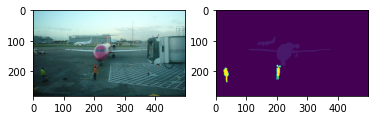

In [12]:
for x, y in tra_ds.take(1):
    images = x.numpy()
    labels = y.numpy()

a = images[0,::]
b = labels[0,::]

print(a.shape)
print(b.shape)

print(a.dtype)
print(b.dtype)

print(np.max(a))
print(np.min(a))

print(np.max(b))
print(np.min(b))


plt.subplot(121)
plt.imshow(a)
plt.subplot(122)
plt.imshow(b)
plt.show()

In [ ]:
fcn8.compile(optimizer=tf.keras.optimizers.Adam(),
             loss="mse")
fcn8.fit(tra_ds)